In [6]:
import zipfile

# Download zip file of pizza_steak images
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/Users/DRIPTO20/Downloads/pizza_steak.zip", "r")
zip_ref.extractall(path="/Users/DRIPTO20/Downloads")
zip_ref.close()

In [5]:
#!ls pizza_steak/train/steak/

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/Users/DRIPTO20/Downloads/pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/Users/DRIPTO20/Downloads/pizza_steak'.
There are 2 directories and 0 images in '/Users/DRIPTO20/Downloads/pizza_steak\test'.
There are 0 directories and 250 images in '/Users/DRIPTO20/Downloads/pizza_steak\test\pizza'.
There are 0 directories and 250 images in '/Users/DRIPTO20/Downloads/pizza_steak\test\steak'.
There are 2 directories and 0 images in '/Users/DRIPTO20/Downloads/pizza_steak\train'.
There are 0 directories and 750 images in '/Users/DRIPTO20/Downloads/pizza_steak\train\pizza'.
There are 0 directories and 750 images in '/Users/DRIPTO20/Downloads/pizza_steak\train\steak'.


In [10]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("/Users/DRIPTO20/Downloads/pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (332, 512, 3)


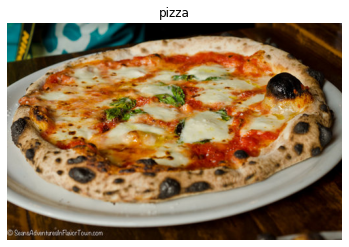

In [30]:
img = view_random_image(target_dir="/Users/DRIPTO20/Downloads/pizza_steak/train/",
                        target_class="pizza")

After going through a dozen or so images from the different classes, you can start to get an idea of what we're working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

In [38]:
img.shape

(332, 512, 3)

In [39]:
#reshaping -- >normalizing
img/255.0

array([[[0.3254902 , 0.55686275, 0.29803922],
        [0.31372549, 0.55294118, 0.31764706],
        [0.2745098 , 0.5372549 , 0.3254902 ],
        ...,
        [0.21960784, 0.18039216, 0.21568627],
        [0.28627451, 0.2745098 , 0.34901961],
        [0.3372549 , 0.3372549 , 0.43921569]],

       [[0.08235294, 0.45098039, 0.34901961],
        [0.07843137, 0.44705882, 0.35294118],
        [0.0627451 , 0.44313725, 0.36470588],
        ...,
        [0.20784314, 0.17254902, 0.19215686],
        [0.27058824, 0.25490196, 0.31372549],
        [0.31764706, 0.30980392, 0.39215686]],

       [[0.        , 0.42352941, 0.45098039],
        [0.        , 0.42352941, 0.44313725],
        [0.        , 0.42352941, 0.43529412],
        ...,
        [0.2       , 0.16078431, 0.16470588],
        [0.25098039, 0.23137255, 0.25882353],
        [0.28235294, 0.2745098 , 0.3254902 ]],

       ...,

       [[0.29803922, 0.16470588, 0.        ],
        [0.33333333, 0.18823529, 0.01176471],
        [0.34117647, 0

### LETS START THE CNN